In [35]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


In [36]:
# Set the date range
date_range = pd.date_range(start="2015-01-01", end="2024-12-31", freq="M")

# Generate sales data with a seasonal pattern and some noise
np.random.seed(42)  # For reproducibility
sales = (
    1000
    + 200 * np.sin(2 * np.pi * date_range.month / 12)
    + np.random.normal(0, 50, len(date_range))
)

# Create the dataset
data = pd.DataFrame({"Date": date_range, "Sales": sales})
data.to_csv("time_series_dataset.csv", index=False)

print(data.head())

        Date        Sales
0 2015-01-31  1124.835708
1 2015-02-28  1166.291866
2 2015-03-31  1232.384427
3 2015-04-30  1249.356574
4 2015-05-31  1088.292331


1. Introduction to Time Series Analysis
Concept:
Time series data represents values observed over time at regular intervals. It is often used to study patterns, identify trends, and make future predictions.

Example:
Sales of a company recorded monthly, daily stock prices, or yearly rainfall measurements.

In [37]:
data.shape

(120, 2)

In [38]:
data = pd.read_csv("time_series_dataset.csv", parse_dates=["Date"])


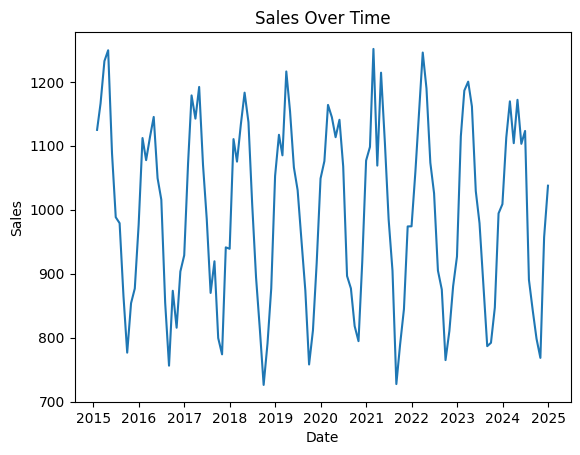

In [39]:
# Plot the time series
plt.plot(data["Date"], data["Sales"])
plt.title("Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()


2. Components of Time Series
Concept:
A time series is made up of the following components:

Trend: Long-term increase or decrease in the data.
Seasonality: Regular patterns that repeat over time (e.g., higher sales during holidays).
Residuals: Random noise or irregular fluctuations.

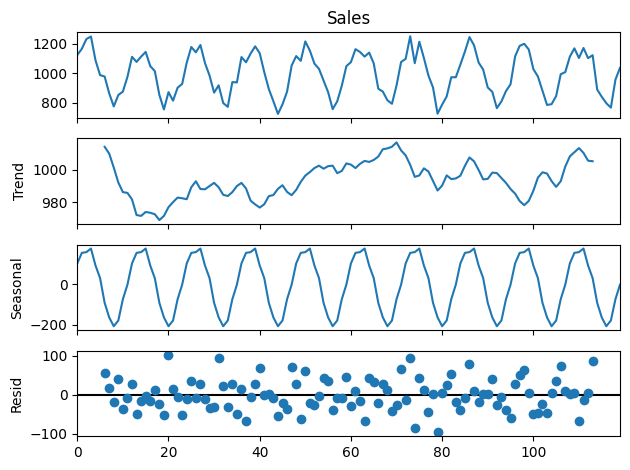

In [40]:
result = seasonal_decompose(data["Sales"], model="additive", period=12)
result.plot()
plt.show()


3. Stationarity
Concept:
A time series is stationary if its mean, variance, and autocorrelation structure do not change over time. Stationarity is crucial because many forecasting methods assume the data is stationary.

In [41]:
# ADF test
adf_test = adfuller(data["Sales"])
print("ADF Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] < 0.05:
    print("The data is stationary.")
else:
    print("The data is not stationary.")


ADF Statistic: -3.581229549349209
p-value: 0.0061301860330051335
The data is stationary.


4. Making Data Stationary
Concept:
Non-stationary data can be made stationary using techniques like differencing or detrending. This removes trends or seasonality, preparing the data for accurate modeling.

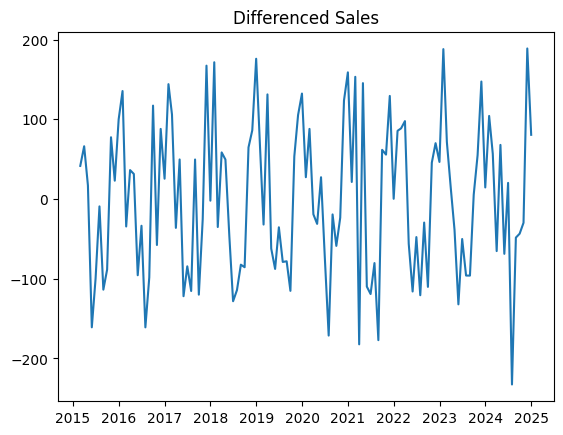

In [42]:
data["Sales_diff"] = data["Sales"].diff()
plt.plot(data["Date"], data["Sales_diff"])
plt.title("Differenced Sales")
plt.show()


Forecasting with ARIMA
Concept:
ARIMA (AutoRegressive Integrated Moving Average) combines:

AutoRegression (AR): Uses past values to predict future values.
Integration (I): Differencing step to make data stationary.
Moving Average (MA): Uses past forecast errors to improve predictions.

In [43]:
# Fit ARIMA model
model = ARIMA(data["Sales"], order=(1, 1, 1))
result = model.fit()

# Forecast
forecast = result.forecast(steps=12)
print("Forecast for next 12 months:\n", forecast)

Forecast for next 12 months:
 120    1066.777625
121    1080.752542
122    1087.445201
123    1090.650350
124    1092.185312
125    1092.920413
126    1093.272457
127    1093.441052
128    1093.521794
129    1093.560461
130    1093.578979
131    1093.587847
Name: predicted_mean, dtype: float64


6. Model Evaluation
Concept:
Evaluating the accuracy of forecasts ensures the model is reliable. Common metrics include Mean Absolute Error (MAE) and Root Mean Square Error (RMSE).

In [ ]:
# Assume we have actual values for comparison (replace 'actual_values' with real data)
actual_values = data["Sales"][-12:]
predicted_values = forecast[:12]
mae = mean_absolute_error(actual_values, predicted_values)
print("Mean Absolute Error:", mae)

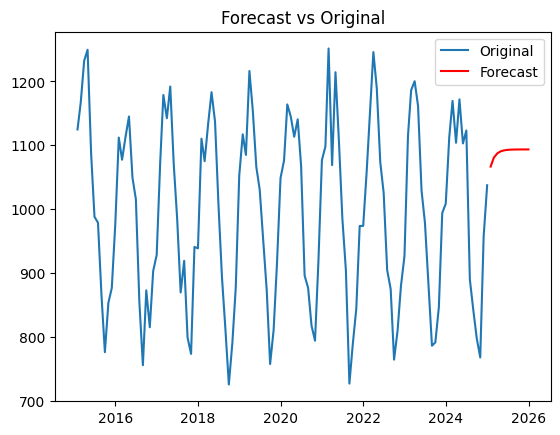

In [51]:
plt.plot(data["Date"], data["Sales"], label="Original")
plt.plot(pd.date_range(start="2025-01-01", periods=12, freq="M"), forecast, label="Forecast", color="red")
plt.legend()
plt.title("Forecast vs Original")
plt.show()